In [687]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

from scipy import stats
from statistics import mode

In [688]:
df = pd.read_csv('Data/precios-en-surtidor-resolucin-3142016.csv')


In [689]:
display(df.dtypes)

indice_tiempo        object
idempresa             int64
cuit                 object
empresa              object
direccion            object
localidad            object
provincia            object
region               object
idproducto            int64
producto             object
idtipohorario         int64
tipohorario          object
precio              float64
fecha_vigencia       object
idempresabandera      int64
empresabandera       object
latitud             float64
longitud            float64
geojson              object
dtype: object

In [690]:
df.head()

,indice_tiempo,idempresa,cuit,empresa,direccion,localidad,provincia,region,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson
0,2017-03,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,6,GNC,2,Diurno,8.79,2017/03/27 10:38:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
1,2017-03,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,6,GNC,3,Nocturno,8.79,2017/03/27 10:38:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
2,2017-04,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,19,Gas Oil Grado 2,2,Diurno,14.96,2017/04/06 20:51:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."
3,2017-04,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,19,Gas Oil Grado 2,3,Nocturno,14.96,2017/04/06 20:51:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."
4,2017-04,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,21,Gas Oil Grado 3,2,Diurno,16.75,2017/04/06 20:52:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."


In [691]:
# Creo el indice con la serie indice_tiempo!!

#df = pd.read_csv('Data/precios-en-surtidor-resolucin-3142016.csv', parse_dates=['indice_tiempo'], index_col='indice_tiempo')


#df = pd.read_csv('Data/precios-en-surtidor-resolucin-3142016.csv', parse_dates=['fecha_vigencia'], index_col=['fecha_vigencia'])

df = pd.read_csv('Data/precios-en-surtidor-resolucin-3142016.csv')

#date_dt2 = datetime.strptime(date_str2, '%m/%d/%y')

df['fecha_hora'] = pd.to_datetime(df.fecha_vigencia)
df['fecha'] = df['fecha_hora'].dt.normalize()
df['indice_tiempo'] = df['fecha']
#df['solo_fecha'] = df['fecha_vigencia'].dt.normalize()
df = df.set_index('fecha')
df.sort_values(by=['fecha'])
df['Anio'] = df.index.year
df['Mes'] = df.index.month

In [692]:
df.index

DatetimeIndex(['2017-03-27', '2017-03-27', '2017-04-06', '2017-04-06',
               '2017-04-06', '2017-04-06', '2017-04-06', '2017-04-06',
               '2017-04-06', '2017-04-06',
               ...
               '2021-02-15', '2021-02-15', '2021-02-03', '2021-02-03',
               '2021-02-15', '2021-02-15', '2021-02-15', '2021-02-15',
               '2020-09-19', '2020-09-19'],
              dtype='datetime64[ns]', name='fecha', length=36630, freq=None)

In [693]:
df.head()

,indice_tiempo,idempresa,cuit,empresa,direccion,localidad,provincia,region,idproducto,producto,...,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson,fecha_hora,Anio,Mes
fecha,,,,,,,,,,,,,,,,,,,,,
2017-03-27,2017-03-27,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,6,GNC,...,8.79,2017/03/27 10:38:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34....",2017-03-27 10:38:00,2017,3
2017-03-27,2017-03-27,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,6,GNC,...,8.79,2017/03/27 10:38:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34....",2017-03-27 10:38:00,2017,3
2017-04-06,2017-04-06,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,19,Gas Oil Grado 2,...,14.96,2017/04/06 20:51:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44....",2017-04-06 20:51:00,2017,4
2017-04-06,2017-04-06,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,19,Gas Oil Grado 2,...,14.96,2017/04/06 20:51:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44....",2017-04-06 20:51:00,2017,4
2017-04-06,2017-04-06,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,21,Gas Oil Grado 3,...,16.75,2017/04/06 20:52:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44....",2017-04-06 20:52:00,2017,4


In [694]:
display(df.producto.value_counts())
display(df.idproducto.value_counts())

Gas Oil Grado 2                     8443
Nafta (súper) entre 92 y 95 Ron     8425
Nafta (premium) de más de 95 Ron    8034
Gas Oil Grado 3                     8027
GNC                                 3701
Name: producto, dtype: int64

19    8443
2     8425
3     8034
21    8027
6     3701
Name: idproducto, dtype: int64

In [695]:
missing_values_check = df.isnull().sum()
print(missing_values_check)

indice_tiempo          0
idempresa              0
cuit                   0
empresa                0
direccion             14
localidad              0
provincia              0
region              4031
idproducto             0
producto               0
idtipohorario          0
tipohorario            0
precio                 0
fecha_vigencia         0
idempresabandera       0
empresabandera         0
latitud              186
longitud             186
geojson              186
fecha_hora             0
Anio                   0
Mes                    0
dtype: int64


In [696]:
#Primero elimino la region que veo que me falta el 50% de los datos, o hay regiones no identificadas.
df.drop(columns=['region'], inplace=True)

In [697]:
#Elimino los datos faltantes, que no tienen coordenadas.
df.dropna(inplace=True)

In [698]:
missing_values_check = df.isnull().sum()
print(missing_values_check)

indice_tiempo       0
idempresa           0
cuit                0
empresa             0
direccion           0
localidad           0
provincia           0
idproducto          0
producto            0
idtipohorario       0
tipohorario         0
precio              0
fecha_vigencia      0
idempresabandera    0
empresabandera      0
latitud             0
longitud            0
geojson             0
fecha_hora          0
Anio                0
Mes                 0
dtype: int64


In [699]:
display(df.columns)
display(df.dtypes)

Index(['indice_tiempo', 'idempresa', 'cuit', 'empresa', 'direccion',
       'localidad', 'provincia', 'idproducto', 'producto', 'idtipohorario',
       'tipohorario', 'precio', 'fecha_vigencia', 'idempresabandera',
       'empresabandera', 'latitud', 'longitud', 'geojson', 'fecha_hora',
       'Anio', 'Mes'],
      dtype='object')

indice_tiempo       datetime64[ns]
idempresa                    int64
cuit                        object
empresa                     object
direccion                   object
localidad                   object
provincia                   object
idproducto                   int64
producto                    object
idtipohorario                int64
tipohorario                 object
precio                     float64
fecha_vigencia              object
idempresabandera             int64
empresabandera              object
latitud                    float64
longitud                   float64
geojson                     object
fecha_hora          datetime64[ns]
Anio                         int64
Mes                          int64
dtype: object

In [700]:
# Eliminamos Outliers altos.
df = df.loc[(df.precio < 120), :]

In [701]:
# Creamos una máscara y la aplicamos al dataframe anterior para traer los registros que necesitamos
nafta_premium = df.loc[(df.idproducto == 3) & (df.precio < 120), :]

# Para Gas Oil
gas_oil = df.loc[(df.idproducto == 19) & (df.precio < 120), :]
# Para Super
nafta_super = df.loc[(df.idproducto == 2) & (df.precio < 120), :]
# Para Super
gas_oil_premium= df.loc[(df.idproducto == 21) & (df.precio < 120), :]
# Para GAS
gnc = df.loc[(df.idproducto == 6) & (df.precio < 100), :]
# Chequeamos cómo quedaron los datos
nafta_premium.head(3)

,indice_tiempo,idempresa,cuit,empresa,direccion,localidad,provincia,idproducto,producto,idtipohorario,...,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson,fecha_hora,Anio,Mes
fecha,,,,,,,,,,,,,,,,,,,,,
2017-04-06,2017-04-06,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,3,Nafta (premium) de más de 95 Ron,2,...,17.27,2017/04/06 20:54:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44....",2017-04-06 20:54:00,2017,4
2017-04-06,2017-04-06,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,3,Nafta (premium) de más de 95 Ron,3,...,17.27,2017/04/06 20:54:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44....",2017-04-06 20:54:00,2017,4
2021-02-15,2021-02-15,1284,30-56342987-5,25 DE MAYO SRL (EESS),25 DE MAYO 675,VILLA MERCEDES,SAN LUIS,3,Nafta (premium) de más de 95 Ron,2,...,95.70,2021/02/15 00:00:00,2,YPF,-33.679540,-65.469880,"{""type"":""Point"",""coordinates"":[-65.46988,-33.6...",2021-02-15 00:00:00,2021,2


In [702]:
nafta_premium.precio.dtypes

dtype('float64')

<AxesSubplot:xlabel='precio'>

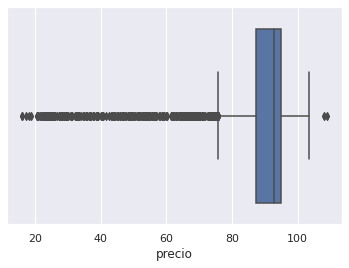

In [703]:
sns.boxplot(x=nafta_premium['precio'])

<AxesSubplot:xlabel='precio'>

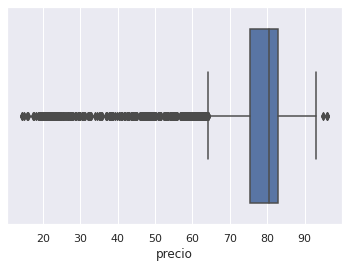

In [704]:
sns.boxplot(x=nafta_super['precio'])

<AxesSubplot:xlabel='precio'>

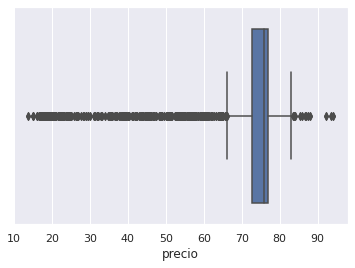

In [705]:
sns.boxplot(x=gas_oil['precio'])

<AxesSubplot:xlabel='precio'>

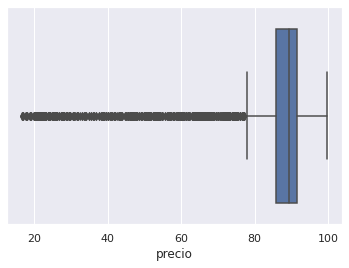

In [706]:
sns.boxplot(x=gas_oil_premium['precio'])

<AxesSubplot:xlabel='precio'>

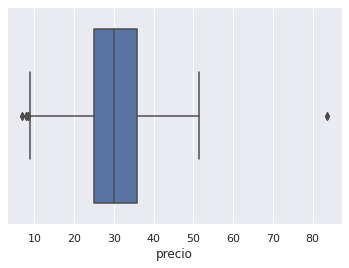

In [707]:
sns.boxplot(x=gnc['precio'])

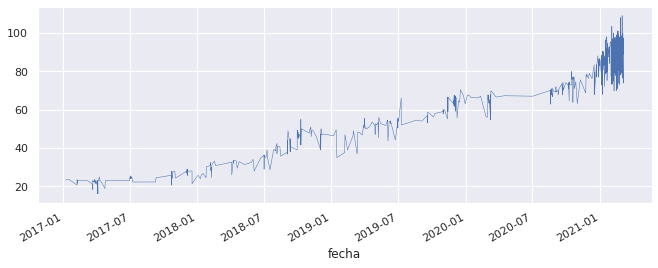

In [708]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11, 4)})
nafta_premium['precio'].plot(linewidth=0.5);

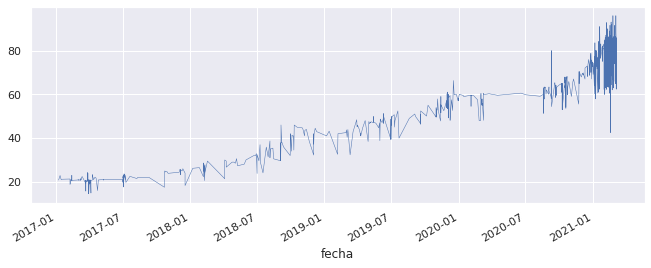

In [709]:
sns.set(rc={'figure.figsize':(11, 4)})
nafta_super['precio'].plot(linewidth=0.5);

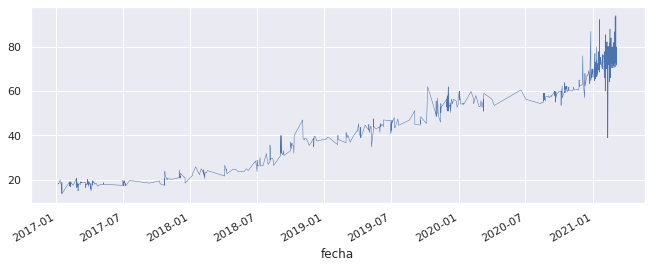

In [710]:
sns.set(rc={'figure.figsize':(11, 4)})
gas_oil['precio'].plot(linewidth=0.5);

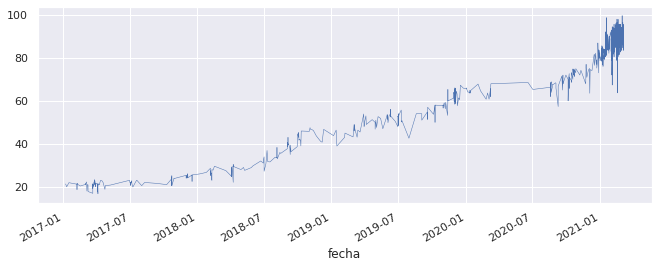

In [711]:
sns.set(rc={'figure.figsize':(11, 4)})
gas_oil_premium['precio'].plot(linewidth=0.5);

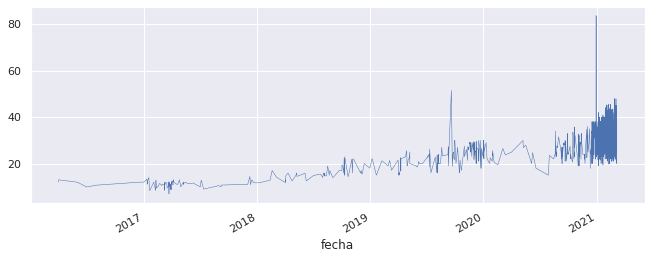

In [712]:
sns.set(rc={'figure.figsize':(11, 4)})
gnc['precio'].plot(linewidth=0.5);

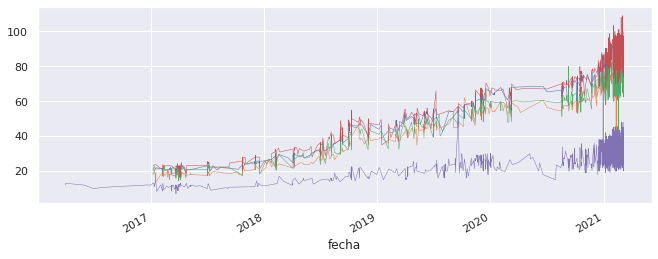

In [713]:
sns.set(rc={'figure.figsize':(11, 4)})
sns.set_theme(style="darkgrid")
gas_oil_premium['precio'].plot(linewidth=0.5);
gas_oil['precio'].plot(linewidth=0.5);
nafta_super['precio'].plot(linewidth=0.5);
nafta_premium['precio'].plot(linewidth=0.5);
gnc['precio'].plot(linewidth=0.5);

<AxesSubplot:xlabel='fecha', ylabel='precio'>

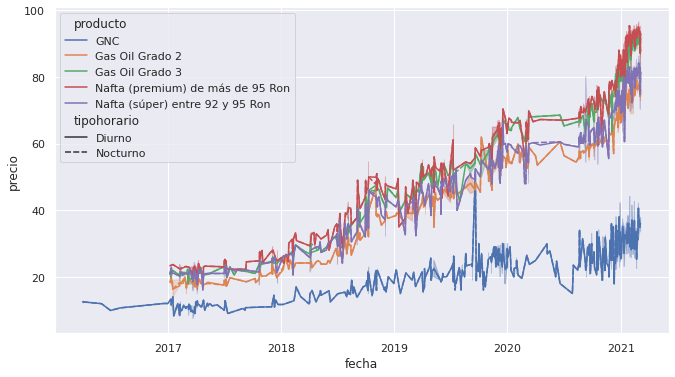

In [714]:
# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(11, 6)})
sns.lineplot(x="fecha", y="precio",
             hue="producto", style="tipohorario",
             data=df)

In [715]:
# Función que plotea la serie:
#def plot_df(nafta_premium, x, y, title="", xlabel='Fecha', ylabel='Precio', dpi=100):
#    plt.figure(figsize=(16,5), dpi=dpi)
#    plt.plot(x, y, color='tab:blue')
#    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
#    plt.show()

#plot_df(nafta_premium, x=nafta_premium.index, y=nafta_premium.precio,\
#        title='Precio del combustible')

In [716]:
nafta_premium.provincia.value_counts()

BUENOS AIRES           2951
CORDOBA                 944
SANTA FE                852
CAPITAL FEDERAL         368
ENTRE RIOS              362
MENDOZA                 310
TUCUMAN                 194
RIO NEGRO               182
CORRIENTES              180
MISIONES                174
CHACO                   160
CHUBUT                  148
SANTIAGO DEL ESTERO     148
LA PAMPA                142
SALTA                   134
NEUQUEN                 132
SAN JUAN                112
SAN LUIS                104
SANTA CRUZ               82
JUJUY                    80
LA RIOJA                 70
FORMOSA                  60
CATAMARCA                60
TIERRA DEL FUEGO         22
Name: provincia, dtype: int64

<AxesSubplot:xlabel='fecha', ylabel='precio'>

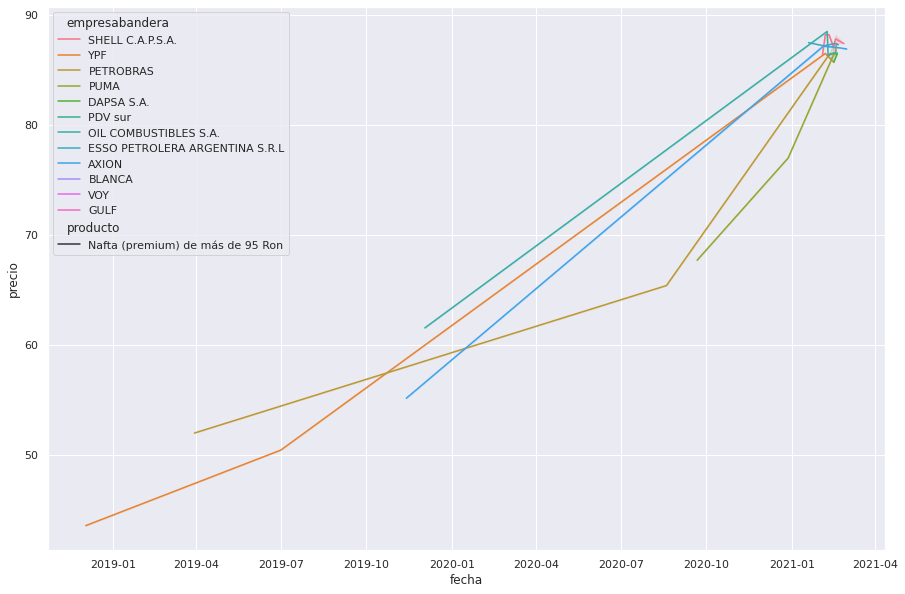

In [726]:
nafta_premium_b4 = nafta_premium.loc[(nafta_premium.localidad == "CAPITAL FEDERAL") , :]

# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(15, 10)})
sns.lineplot(x="fecha", y="precio",
             hue="empresabandera", style="producto",
             data=nafta_premium_b4)

<AxesSubplot:xlabel='fecha', ylabel='precio'>

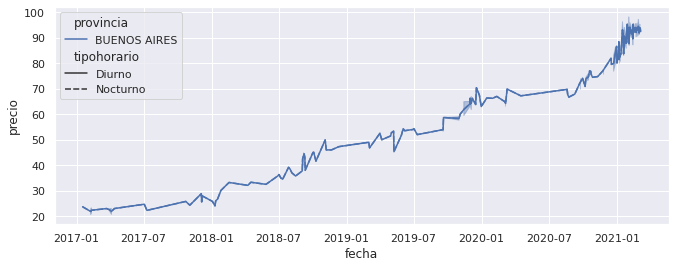

In [718]:
nafta_premium_b3 = nafta_premium.loc[(nafta_premium.provincia == "BUENOS AIRES"), :]

# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(11, 4)})
sns.lineplot(x="fecha", y="precio",
             hue="provincia", style="tipohorario",
             data=nafta_premium_b3)

<AxesSubplot:xlabel='fecha', ylabel='precio'>

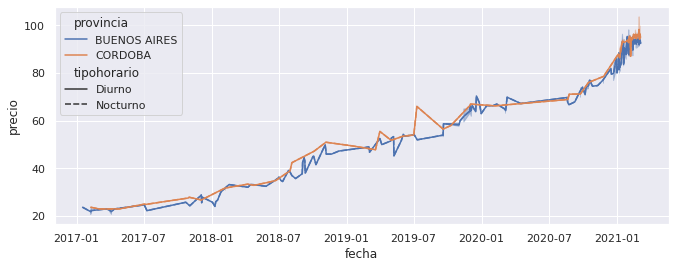

In [719]:
nafta_premium_b2 = nafta_premium.loc[(nafta_premium.provincia == "BUENOS AIRES") ^ (nafta_premium.provincia == "CORDOBA"), :]

# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(11, 4)})
sns.lineplot(x="fecha", y="precio",
             hue="provincia", style="tipohorario",
             data=nafta_premium_b2)

<AxesSubplot:xlabel='fecha', ylabel='precio'>

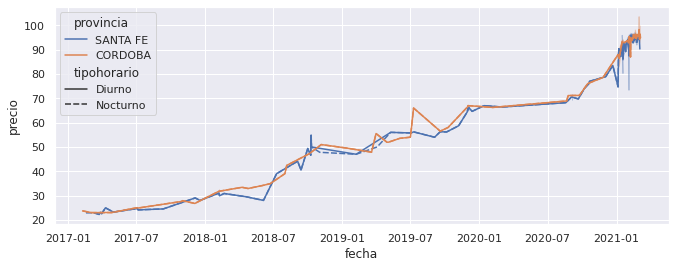

In [720]:
nafta_premium_b1 = nafta_premium.loc[(nafta_premium.provincia == "SANTA FE") ^ (nafta_premium.provincia == "CORDOBA"), :]

# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(11, 4)})
sns.lineplot(x="fecha", y="precio",
             hue="provincia", style="tipohorario",
             data=nafta_premium_b1)

<AxesSubplot:xlabel='fecha', ylabel='precio'>

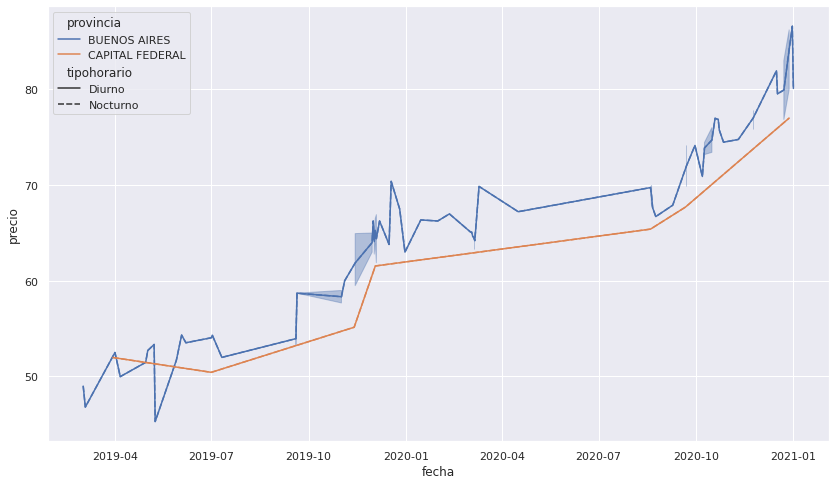

In [721]:
nafta_premium_a1 = nafta_premium.loc[(nafta_premium.provincia == "BUENOS AIRES") ^ (nafta_premium.provincia == "CAPITAL FEDERAL"), :]
# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(14, 8)})
sns.lineplot(x="fecha", y="precio",
             hue="provincia", style="tipohorario",
             data=nafta_premium_a1.loc['2019-01-07':'2021-01-01'])

<h2> HAY que tener en cuenta que los precios son de todo el país por esto mismo tenemos dispersión de precios.</h2>

In [728]:
df.head(3)

,indice_tiempo,idempresa,cuit,empresa,direccion,localidad,provincia,idproducto,producto,idtipohorario,...,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson,fecha_hora,Anio,Mes
fecha,,,,,,,,,,,,,,,,,,,,,
2017-03-27,2017-03-27,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,6,GNC,2,...,8.79,2017/03/27 10:38:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34....",2017-03-27 10:38:00,2017,3
2017-03-27,2017-03-27,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,6,GNC,3,...,8.79,2017/03/27 10:38:00,1,BLANCA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34....",2017-03-27 10:38:00,2017,3
2017-04-06,2017-04-06,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,19,Gas Oil Grado 2,2,...,14.96,2017/04/06 20:51:00,26,AXION,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44....",2017-04-06 20:51:00,2017,4


In [736]:
# Resampling

data_columns = ['precio']

# Resample to weekly frequency, aggregating with mean
nafta_premium_mes = nafta_premium[data_columns].resample('M').mean()
nafta_premium_mes.head

<bound method NDFrame.head of                precio
fecha                
2017-01-31  23.495000
2017-02-28  22.444545
2017-03-31  22.511538
2017-04-30  21.473750
2017-05-31  23.200000
2017-06-30        NaN
2017-07-31  24.516316
2017-08-31        NaN
2017-09-30  23.400000
2017-10-31  26.058000
2017-11-30  26.063333
2017-12-31  26.918750
2018-01-31  26.190000
2018-02-28  30.462692
2018-03-31        NaN
2018-04-30  31.387143
2018-05-31  31.925000
2018-06-30  33.227500
2018-07-31  34.420000
2018-08-31  39.135714
2018-09-30  42.422308
2018-10-31  47.206400
2018-11-30  48.463846
2018-12-31  45.832857
2019-01-31  43.623333
2019-02-28  41.186667
2019-03-31  47.178889
2019-04-30  51.530000
2019-05-31  52.045000
2019-06-30  51.801000
2019-07-31  54.793846
2019-08-31  54.490000
2019-09-30  56.040000
2019-10-31  57.075000
2019-11-30  60.669286
2019-12-31  64.710000
2020-01-31  66.790000
2020-02-29  63.120000
2020-03-31  64.704375
2020-04-30  67.210000
2020-05-31        NaN
2020-06-30        NaN
20

In [722]:
# Datos de Nafta Premiun
nafta_premium.to_csv(path_or_buf='Data/nafta_premium.csv', sep=',',
                   header=True, encoding='utf8', index=False)
# Datos de Nafta Super
nafta_super.to_csv(path_or_buf='Data/nafta_super.csv', sep=',',
                   header=True, encoding='utf8', index=False)
# Datos de Gas Oil
gas_oil.to_csv(path_or_buf='Data/gas_oil.csv', sep=',',
                   header=True, encoding='utf8', index=False)
# Datos de Gas Oil Premium
gas_oil_premium.to_csv(path_or_buf='Data/gas_oil_premium.csv', sep=',',
                   header=True, encoding='utf8', index=False)
# Datos de GNC
gnc.to_csv(path_or_buf='Data/gnc.csv', sep=',',
                   header=True, encoding='utf8', index=False)

# Datos de con indice FECHA
df.to_csv(path_or_buf='Data/precios-en-surtidor.csv', sep=',',
                   header=True, encoding='utf8', index=False)